In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
i_data=pd.read_csv('carInsurance_train.csv')
i_test=pd.read_csv('carInsurance_test.csv')

In [3]:
i_data.shape

(8000, 19)

In [4]:
i_test.shape

(2000, 19)

In [5]:
i_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,32.0,management,single,tertiary,0.0,1218.0,1.0,0.0,telephone,28.0,jan,2.0,-1.0,0.0,NaN,13:45:20,13:46:30,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,32.0,blue-collar,married,primary,0.0,1156.0,1.0,0.0,NaN,26.0,may,5.0,-1.0,0.0,NaN,14:49:03,14:52:08,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
i_data.dropna(how='all',inplace=True)

In [7]:
i_data.shape

(4000, 19)

In [8]:
i_test.dropna(how='all',inplace=True)

In [9]:
i_test.shape

(1000, 19)

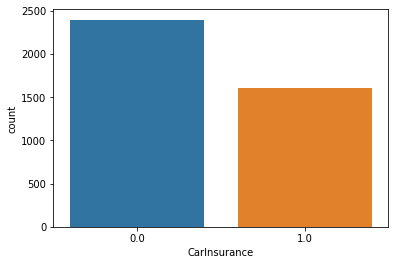

In [10]:
sns.countplot('CarInsurance',data=i_data)

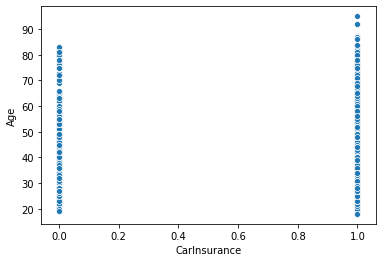

In [11]:
sns.scatterplot(y='Age',x='CarInsurance',data=i_data)

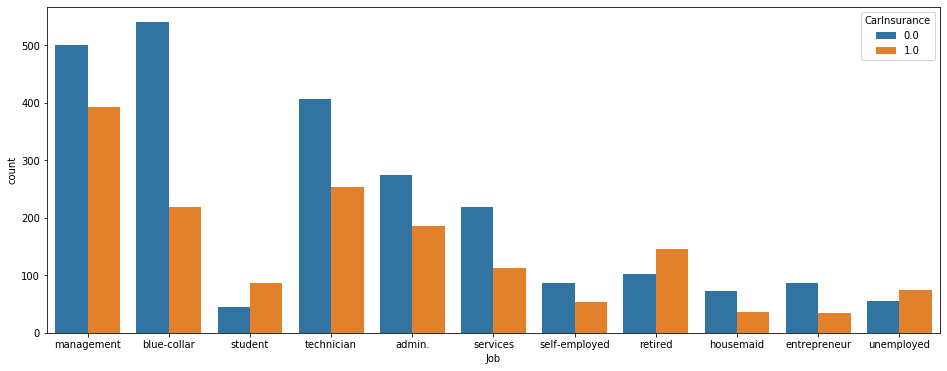

In [12]:
plt.figure(figsize=(16,6))
sns.countplot('Job',hue='CarInsurance',data=i_data)

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


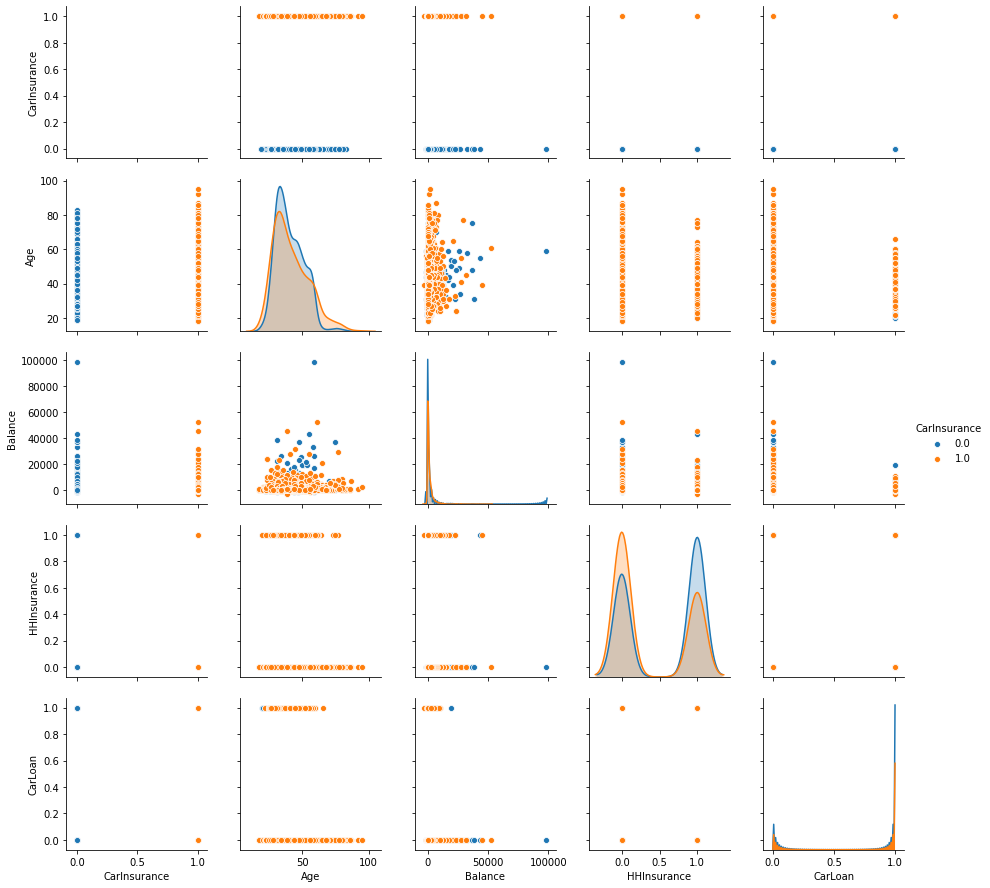

In [13]:
cols = ['CarInsurance','Age','Balance','HHInsurance','CarLoan']
sns.pairplot(i_data[cols],hue='CarInsurance')

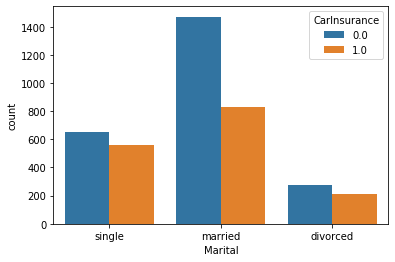

In [14]:
sns.countplot('Marital',hue='CarInsurance',data=i_data)

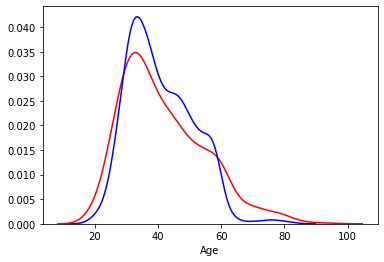

In [15]:
sns.distplot(i_data['Age'][i_data['CarInsurance']==1],hist=False,color='red')
sns.distplot(i_data['Age'][i_data['CarInsurance']==0],hist=False,color='blue')

In [16]:
i_data[i_data['Balance']>60000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3485,1743.0,59.0,management,married,tertiary,0.0,98417.0,0.0,0.0,telephone,20.0,nov,5.0,-1.0,0.0,NaN,10:51:42,10:54:07,0.0


In [17]:
i_data.drop([3485],inplace=True)

## Handling missing values

In [18]:
merge_data = pd.concat([i_data,i_test],keys=('train','test'))

In [19]:
merge_data

Id   Age          Job  Marital  Education  Default  Balance  \
train 1        1.0  32.0   management   single   tertiary      0.0   1218.0   
      3        2.0  32.0  blue-collar  married    primary      0.0   1156.0   
      5        3.0  29.0   management   single   tertiary      0.0    637.0   
      7        4.0  25.0      student   single    primary      0.0    373.0   
      9        5.0  30.0   management  married   tertiary      0.0   2694.0   
...            ...   ...          ...      ...        ...      ...      ...   
test  1991  4996.0  31.0       admin.   single  secondary      0.0    131.0   
      1993  4997.0  52.0   management  married   tertiary      0.0   2635.0   
      1995  4998.0  46.0   technician  married   tertiary      0.0   3009.0   
      1997  4999.0  60.0      retired  married  secondary      0.0   7038.0   
      1999  5000.0  28.0   management   single   tertiary      0.0    957.0   

            HHInsurance  CarLoan Communication  LastContactDay  \
train 1             1.0      0.0     telephone            28.0   
      3             1.0      0.0           NaN            26.0   
      5             1.0      0.0      cellular             3.0   
      7             1.0      0.0      cellular            11.0   
      9             0.0      0.0      cellular             3.0   
...                 ...      ...           ...             ...   
test  1991          1.0      0.0      cellular            15.0   
      1993          0.0      0.0      cellular             6.0   
      1995          0.0      0.0      cellular             4.0   
      1997          0.0      0.0     telephone             7.0   
      1999          0.0      0.0      cellular            25.0   

           LastContactMonth  NoOfContacts  DaysPassed  PrevAttempts  Outcome  \
train 1                 jan           2.0        -1.0           0.0      NaN   
      3                 may           5.0        -1.0           0.0      NaN   
      5                 jun           1.0       119.0           1.0  failure   
      7                 may           2.0        -1.0           0.0      NaN   
      9                 jun           1.0        -1.0           0.0      NaN   
...                     ...           ...         ...           ...      ...   
test  1991              jun           1.0        -1.0           0.0      NaN   
      1993              sep           1.0       108.0           8.0  success   
      1995              aug           2.0        -1.0           0.0      NaN   
      1997              oct           4.0        -1.0           0.0      NaN   
      1999              may           2.0        -1.0           0.0      NaN   

           CallStart   CallEnd  CarInsurance  
train 1     13:45:20  13:46:30           0.0  
      3     14:49:03  14:52:08           0.0  
      5     16:30:24  16:36:04           1.0  
      7     12:06:43  12:20:22           1.0  
      9     14:35:44  14:38:56           0.0  
...              ...       ...           ...  
test  1991  13:54:24  13:56:55           NaN  
      1993  13:13:38  13:18:51           NaN  
      1995  10:23:35  10:24:33           NaN  
      1997  17:01:49  17:04:07           NaN  
      1999  12:15:19  12:30:34           NaN  

[4999 rows x 19 columns]

In [20]:
merge_data.drop(['Id','CallStart','CallEnd'],axis=1,inplace=True)

In [21]:
merge_data.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CarInsurance        1000
dtype: int64

In [22]:
merge_data_df=merge_data.copy()

In [23]:
merge_data_df[merge_data_df['Outcome'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.0,3798.0,3041.000000
mean,41.172722,0.016588,1414.180358,0.496051,0.140864,16.059768,2.798315,-1.0,0.0,0.343637
std,11.275358,0.127737,3032.231216,0.500050,0.347927,8.442643,3.292817,0.0,0.0,0.475000
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.0,0.0,0.000000
25%,32.000000,0.000000,83.000000,0.000000,0.000000,8.000000,1.000000,-1.0,0.0,0.000000
50%,39.000000,0.000000,482.500000,0.000000,0.000000,16.500000,2.000000,-1.0,0.0,0.000000
75%,49.000000,0.000000,1505.500000,1.000000,0.000000,22.000000,3.000000,-1.0,0.0,1.000000
max,95.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,43.000000,-1.0,0.0,1.000000


In [24]:
merge_data_df['Outcome'].fillna('NoPrevContact',inplace=True)

In [25]:
merge_data_df['Outcome'].isnull().sum()

0

In [26]:
merge_data_df[merge_data_df['Communication'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,902.000000
mean,40.501336,0.018700,1165.617097,0.706144,0.143366,15.596616,2.688335,1.700801,0.020481,0.186253
std,9.502357,0.135523,2634.372948,0.455730,0.350602,8.496422,3.022335,39.179002,0.385255,0.389526
min,20.000000,0.000000,-1547.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,419.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1219.000000,1.000000,0.000000,23.000000,3.000000,-1.000000,0.000000,0.000000
max,61.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,41.000000,779.000000,12.000000,1.000000


In [27]:
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [28]:
merge_data_df['Communication'].fillna('cellular',inplace=True)

In [29]:
merge_data_df['Communication'].isnull().sum()

0

In [30]:
merge_data_df[merge_data_df['Education'].isnull()].describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,169.000000
mean,44.745370,0.004630,1571.643519,0.388889,0.078704,15.976852,2.745370,60.194444,0.939815,0.467456
std,14.913237,0.068041,3505.376419,0.488630,0.269901,8.573318,3.762109,116.649302,2.199596,0.500422
min,18.000000,0.000000,-277.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,34.750000,0.000000,243.750000,0.000000,0.000000,9.000000,1.000000,-1.000000,0.000000,0.000000
50%,44.000000,0.000000,702.000000,0.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,54.000000,0.000000,1780.000000,1.000000,0.000000,22.000000,3.000000,91.250000,1.000000,1.000000
max,92.000000,1.000000,45248.000000,1.000000,1.000000,31.000000,34.000000,683.000000,12.000000,1.000000


In [31]:
merge_data_df['Education'].value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

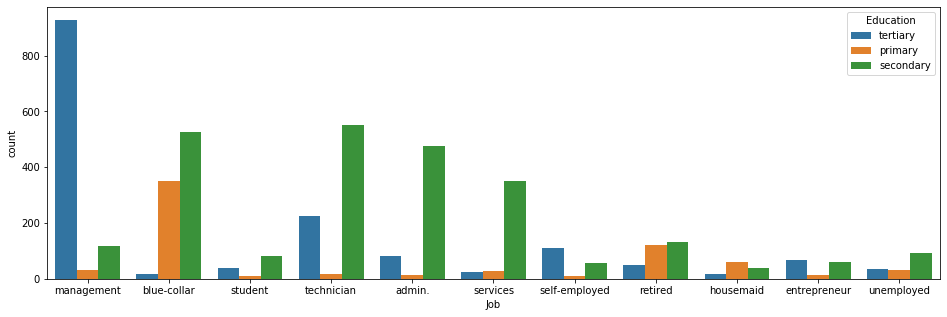

In [32]:
plt.figure(figsize=(16,5))
sns.countplot('Job',hue='Education',data=merge_data_df)

In [33]:
edu_map=merge_data_df.groupby('Job')['Education'].describe()['top']

In [34]:
edu_map

Job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
Name: top, dtype: object

In [35]:
merge_data_df['Education'].isnull().sum()

216

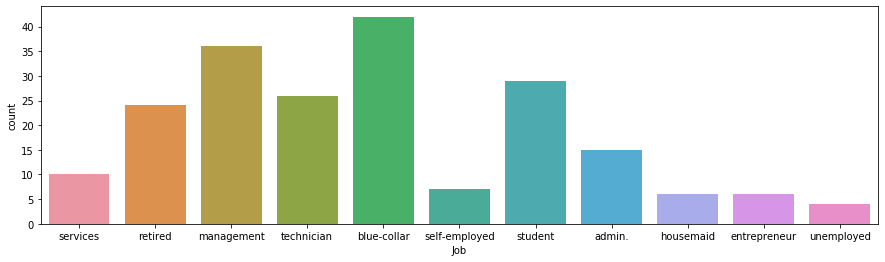

In [36]:
plt.figure(figsize=(15,4))
sns.countplot('Job',data=merge_data_df[merge_data_df['Education'].isnull()])

In [37]:
job_types=merge_data_df['Job'].value_counts().index

In [38]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [39]:
for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

In [40]:
merge_data_df['Education'].isnull().sum()

11

In [41]:
merge_data_df.isnull().sum()

Age                    0
Job                   24
Marital                0
Education             11
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome                0
CarInsurance        1000
dtype: int64

In [42]:
merge_data_df.dropna(inplace=True)

In [43]:
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CarInsurance        0
dtype: int64

### Seperate out numerical data

In [44]:
numeric_cols=merge_data_df.select_dtypes(include=[np.number]).columns

In [45]:
numeric_cols

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance'],
      dtype='object')

In [46]:
merge_data_df_num = merge_data_df[numeric_cols]

In [47]:
categorical_cols = merge_data_df.select_dtypes(include=['object']).columns

In [48]:
categorical_cols

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

In [49]:
merge_data_df_cat= merge_data_df[categorical_cols]

In [50]:
merge_data_df_cat_dummies=pd.get_dummies(merge_data_df_cat)

In [51]:
i_data_combined = pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [52]:
i_data_combined

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 1     32.0      0.0   1218.0          1.0      0.0            28.0   
      3     32.0      0.0   1156.0          1.0      0.0            26.0   
      5     29.0      0.0    637.0          1.0      0.0             3.0   
      7     25.0      0.0    373.0          1.0      0.0            11.0   
      9     30.0      0.0   2694.0          0.0      0.0             3.0   
...          ...      ...      ...          ...      ...             ...   
      7991  28.0      0.0      0.0          1.0      0.0            25.0   
      7993  49.0      0.0    124.0          1.0      1.0            29.0   
      7995  27.0      0.0   -400.0          0.0      1.0             8.0   
      7997  36.0      0.0    658.0          1.0      0.0            29.0   
      7999  45.0      0.0    137.0          1.0      0.0             9.0   

            NoOfContacts  DaysPassed  PrevAttempts  CarInsurance  ...  \
train 1              2.0        -1.0           0.0           0.0  ...   
      3              5.0        -1.0           0.0           0.0  ...   
      5              1.0       119.0           1.0           1.0  ...   
      7              2.0        -1.0           0.0           1.0  ...   
      9              1.0        -1.0           0.0           0.0  ...   
...                  ...         ...           ...           ...  ...   
      7991           1.0        40.0           2.0           1.0  ...   
      7993          19.0        -1.0           0.0           0.0  ...   
      7995           1.0        -1.0           0.0           0.0  ...   
      7997           1.0       227.0           3.0           0.0  ...   
      7999           2.0        -1.0           0.0           0.0  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 1                        0                     0                     0   
      3                        0                     0                     1   
      5                        1                     0                     0   
      7                        0                     0                     1   
      9                        1                     0                     0   
...                          ...                   ...                   ...   
      7991                     0                     0                     1   
      7993                     0                     0                     0   
      7995                     0                     0                     0   
      7997                     0                     0                     0   
      7999                     0                     0                     1   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 1                        0                     0                     0   
      3                        0                     0                     0   
      5                        0                     0                     0   
      7                        0                     0                     0   
      9                        0                     0                     0   
...                          ...                   ...                   ...   
      7991                     0                     0                     0   
      7993                     0                     0                     0   
      7995                     0                     0                     0   
      7997                     0                     0                     0   
      7999                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 1                         1                0              0   
      3                         1                0              0   
      5                         0                1              0   
      7                  

In [53]:
data=i_data_combined.loc[['train'],::]

In [54]:
data.shape

(3980, 45)

In [55]:
X=data.drop(columns='CarInsurance')

In [56]:
X.shape

(3980, 44)

In [57]:
Y=data['CarInsurance']

In [58]:
Y.shape

(3980,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=100)

In [61]:
X_train

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 2867  31.0      0.0    140.0          0.0      0.0             6.0   
      5503  34.0      0.0   5945.0          1.0      0.0             8.0   
      2757  37.0      0.0   2128.0          0.0      0.0            18.0   
      1675  45.0      0.0   3492.0          1.0      1.0            20.0   
      3961  48.0      0.0    278.0          1.0      0.0             5.0   
...          ...      ...      ...          ...      ...             ...   
      7895  40.0      0.0    260.0          1.0      0.0            13.0   
      7927  56.0      1.0   1238.0          0.0      0.0             5.0   
      3739  33.0      0.0    227.0          1.0      1.0            13.0   
      5713  38.0      0.0    508.0          1.0      0.0            18.0   
      3105  35.0      0.0   2427.0          0.0      0.0            12.0   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 2867           8.0       212.0           4.0           0  ...   
      5503           1.0       170.0           1.0           0  ...   
      2757           1.0        -1.0           0.0           0  ...   
      1675           4.0        -1.0           0.0           0  ...   
      3961           2.0        -1.0           0.0           0  ...   
...                  ...         ...           ...         ...  ...   
      7895           1.0       181.0           5.0           1  ...   
      7927           1.0        -1.0           0.0           0  ...   
      3739           2.0        -1.0           0.0           0  ...   
      5713           3.0       175.0           2.0           0  ...   
      3105           3.0       158.0           7.0           0  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 2867                     0                     0                     0   
      5503                     0                     0                     1   
      2757                     1                     0                     0   
      1675                     1                     0                     0   
      3961                     0                     0                     1   
...                          ...                   ...                   ...   
      7895                     0                     0                     1   
      7927                     1                     0                     0   
      3739                     0                     0                     0   
      5713                     0                     0                     0   
      3105                     0                     0                     0   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 2867                     0                     0                     0   
      5503                     0                     0                     0   
      2757                     0                     0                     0   
      1675                     0                     0                     0   
      3961                     0                     0                     0   
...                          ...                   ...                   ...   
      7895                     0                     0                     0   
      7927                     0                     0                     0   
      3739                     0                     0                     0   
      5713                     1                     0                     0   
      3105                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 2867                      0                0              1   
      5503                      0                1              0   
      2757                      1                0              0   
      1675                      1                

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lr=LogisticRegression()

In [64]:
lr.fit(X_train,Y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
Y_pred=lr.predict(X_test)

In [66]:
Y_pred

array([1., 0., 0., ..., 0., 0., 0.])

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(Y_test,Y_pred)

array([[609,  74],
       [297, 214]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy=accuracy_score(Y_test,Y_pred)

In [71]:
accuracy

0.6892797319932998

In [72]:
X_train

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 2867  31.0      0.0    140.0          0.0      0.0             6.0   
      5503  34.0      0.0   5945.0          1.0      0.0             8.0   
      2757  37.0      0.0   2128.0          0.0      0.0            18.0   
      1675  45.0      0.0   3492.0          1.0      1.0            20.0   
      3961  48.0      0.0    278.0          1.0      0.0             5.0   
...          ...      ...      ...          ...      ...             ...   
      7895  40.0      0.0    260.0          1.0      0.0            13.0   
      7927  56.0      1.0   1238.0          0.0      0.0             5.0   
      3739  33.0      0.0    227.0          1.0      1.0            13.0   
      5713  38.0      0.0    508.0          1.0      0.0            18.0   
      3105  35.0      0.0   2427.0          0.0      0.0            12.0   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 2867           8.0       212.0           4.0           0  ...   
      5503           1.0       170.0           1.0           0  ...   
      2757           1.0        -1.0           0.0           0  ...   
      1675           4.0        -1.0           0.0           0  ...   
      3961           2.0        -1.0           0.0           0  ...   
...                  ...         ...           ...         ...  ...   
      7895           1.0       181.0           5.0           1  ...   
      7927           1.0        -1.0           0.0           0  ...   
      3739           2.0        -1.0           0.0           0  ...   
      5713           3.0       175.0           2.0           0  ...   
      3105           3.0       158.0           7.0           0  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 2867                     0                     0                     0   
      5503                     0                     0                     1   
      2757                     1                     0                     0   
      1675                     1                     0                     0   
      3961                     0                     0                     1   
...                          ...                   ...                   ...   
      7895                     0                     0                     1   
      7927                     1                     0                     0   
      3739                     0                     0                     0   
      5713                     0                     0                     0   
      3105                     0                     0                     0   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 2867                     0                     0                     0   
      5503                     0                     0                     0   
      2757                     0                     0                     0   
      1675                     0                     0                     0   
      3961                     0                     0                     0   
...                          ...                   ...                   ...   
      7895                     0                     0                     0   
      7927                     0                     0                     0   
      3739                     0                     0                     0   
      5713                     1                     0                     0   
      3105                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 2867                      0                0              1   
      5503                      0                1              0   
      2757                      1                0              0   
      1675                      1                

In [73]:
X_test

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 2439  31.0      0.0   1664.0          1.0      0.0            20.0   
      6089  25.0      0.0   2311.0          0.0      1.0            21.0   
      1419  38.0      0.0      0.0          1.0      0.0            26.0   
      7407  56.0      0.0    784.0          0.0      1.0            30.0   
      5159  58.0      0.0    565.0          0.0      0.0             8.0   
...          ...      ...      ...          ...      ...             ...   
      4641  58.0      0.0   2160.0          1.0      1.0             5.0   
      2307  51.0      0.0    684.0          1.0      0.0            20.0   
      3333  36.0      0.0      0.0          1.0      0.0             8.0   
      7853  46.0      0.0     57.0          0.0      0.0            28.0   
      2961  44.0      0.0   1074.0          1.0      0.0            11.0   

            NoOfContacts  DaysPassed  PrevAttempts  Job_admin.  ...  \
train 2439           1.0       182.0           1.0           0  ...   
      6089           2.0        -1.0           0.0           0  ...   
      1419          38.0        -1.0           0.0           0  ...   
      7407           2.0        -1.0           0.0           0  ...   
      5159           1.0        93.0           1.0           0  ...   
...                  ...         ...           ...         ...  ...   
      4641           1.0        -1.0           0.0           1  ...   
      2307           1.0        -1.0           0.0           1  ...   
      3333           1.0       368.0           1.0           0  ...   
      7853           1.0        -1.0           0.0           0  ...   
      2961           2.0        -1.0           0.0           1  ...   

            LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 2439                     0                     0                     0   
      6089                     0                     0                     0   
      1419                     0                     0                     0   
      7407                     0                     0                     0   
      5159                     0                     0                     0   
...                          ...                   ...                   ...   
      4641                     0                     0                     1   
      2307                     0                     0                     0   
      3333                     0                     0                     1   
      7853                     0                     0                     1   
      2961                     0                     0                     0   

            LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 2439                     0                     0                     0   
      6089                     0                     0                     0   
      1419                     0                     0                     0   
      7407                     0                     0                     0   
      5159                     0                     1                     0   
...                          ...                   ...                   ...   
      4641                     0                     0                     0   
      2307                     1                     0                     0   
      3333                     0                     0                     0   
      7853                     0                     0                     0   
      2961                     0                     0                     0   

            Outcome_NoPrevContact  Outcome_failure  Outcome_other  \
train 2439                      0                0              0   
      6089                      1                0              0   
      1419                      1                0              0   
      7407                      1                

In [74]:
from sklearn.metrics import f1_score
f1_score(Y_test,Y_pred)

## F1 score = 2*precision*recall/(precision+recall)

0.5356695869837297